## python 패키지 불러오기
---

In [2]:
# 데이터 구성 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats

# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


%matplotlib inline

In [3]:
# matplotlib 패키지 한글 깨침 처리
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family = 'AppleGothic')

# 0. 통계적 가설 검정
---

## ▪️ 절차
### 1) 가설 수립
- 가설 검정의 목적 확인
- 주장하고자 하는 판단 결과를 대립가설(H1)로, 그 반대를 귀무가설(H0)으로 설정
- 유의수준(α) 결정

### 2) 가설 검정의 수행
- 적절한 검정통계량 결정(t, F, x^)
- 검정통계량 계산
- p-value 계산

### 3) 검정결과의 판단
- 검정통계량과 임계값
    - 검정통계량 > 임계값 : H0 기각
    - 검정통계량 < 임계값 : H0 기각 불가
- p-value와 유의수준(α)
    - p-value < 유의수준(α) : H0 기각
    - p-value > 유의수준(α) : H0 기각 불가

## ▪️ 가설
### 1) H0 : 귀무가설(Null Hypothesis)
- **기존의 사실에 대한 가설**
- 검정통계량은 귀무가설의 분포에서 나옴
- 검정의 대상으로 삼는 가설로, <u>영향을 주지 않는다는 입장</u>

### 2) H1 : 대립가설(Alternative Hypothesis)
- **새롭게 확인하고자 하는 사실에 대한 가설**
- 검정통계량이 귀무가설에서 나왔다고 보기 어려운 경우(p-value가 작은 경우) 대립가설 선택
- 귀무가설 부정하는 가설로, <u>영향을 준다는 입장</u>

## ▪️ 유의수준 (α)
- 귀무가설을 기각한다는 결정을 내릴 때, 귀무가설을 기각하는 결정이 잘못될 수 있을 최대가능성(확률)
- 1종 오류를 범할 확률의 최대 허용치

## ▪️ 임계값
- 주어진 유의수준에서 귀무가설의 채택과 기각에 관련된 의사결정을 할 때, 그 기준이 되는 통계량 의미
- 임계값을 중심으로 기무가설의 기각영역과 채택영역 결정

## ▪️ p-value
- **귀무가설이 참이라는 가정하에 표본데이터가 귀무가설을 지지하는 확률**
- p-value가 유의수준보다 작으면 귀무가설(H0)기각하고, 그렇지 않으면 귀무가설(H0) 기각하지 못함
- **"귀무가설을 기각할 수 없다." : 귀무가설이 옳다(X), 귀무가설 기각할 확실한 증거가 없다(O)**

## ▪️ 가설검정의 오류 (Testing Error)
### 1) 제 1종 오류
- 참인 귀무가설을 기각하고 대립가설 채택
    - 실제로 죄가 없는데도 불구하고 유죄판결을 받음

### 2) 제 2종 오류 
- 거짓인 귀무가설을 기각하지 않고 귀무가설 유지
    - 실제로 범죄를 저질렀는데 무죄판결을 받음

|검정결과\실제현상|H0 참|H1 참|
|------|---|---|
|귀무가설 H0 채택|옳은 결정|**제 2종 오류**|
|대립가설 H1 채택|**제 1종 오류**|옳은 결정|

<br>

# 1. 평균검정 : t-test
---

## ▪️ 정의
- 모집단에서 추출된 표본의 통계량(평균, 표준편차 등)을 이용하여 모집단의 평균의 차이에 대한 검정
- 일반적으로는 **2집단의 평균의 차이가 유의한지**를 통계적으로 검정하는 기법

## ▪️ 용도 및 활용
- 모집단의 모수(평균, 평균의 차이)에 대한 가설 검정
- 양측 및 단측 검정을 이용한 모수 검정

## ▪️ 고려사항
- 비교 집단의 분포 및 분산 확인
    - 독립성
    - 정규성
    - 등분산성

## ▪️ 검정절차
### 1) 가설 수립 유의수준 설정
- 귀무가설(H0) : 두 집단의 평균은 같다
- 대립가설(H1) : 두 집단의 평균은 같지 않다
- 유의수준 설정 : 0.1 or 0.05 or 0.01

### 2) 가설검정 수행
- 검정 통계량 값 계산
    - 두 집단의 분산이 동일하다는 가정하에 t값 계산
    - 두 집단의 분산이 동일하지 않다는 가정하에 t값 계산
    
### 3) 검정 결과 판단
- 두 집단의 등분산 검정을 위한 검정통계량 F값 계산
- 등분산 여부에 따른 t값 선택
- t값의 통계적 유의성 검정 통해 가설을 기각하거나 채택

## ▪️ t-test 종류
### 1) 1-sample t-test
- 한 집단의 평균이 특정 값과 같은지 비교
    - 고객서비스 센터의 고객만족도 평균은 76.7이 맞는가?

### 2) 2-sample t-test
- 두 집단 간 평균이 같은지 비교
    - 재료 A와 B로 만든 각 제품의 강도는 같은가?
    
### 3) paired t-test
- 쌍을 이룬 두 집단간 평균이 같은지 비교
    - 교육 전과 후의 시험 점수에 차이가 있는가?

<br>

# 2. 1-sample t-test
---

## ▪️ 정의
- 단일 집단에 대한 모평균의 검정. 단일 집단의 평균이 기존에 주장하는 평균과 다른지에 대한 검정

## ▪️ 모평균의 구간 추정
### 1) 모 표준편차를 아는 경우
- Z 분포를 따름

### 2) 모 표준편차를 모르는 경우
- t분포를 따름

<br>

# 3. 연습 및 실습 (1-sample t-test)
---

## [연습1]
- 고객만족도 평균 76.7
- 개선활동이 만족도를 변화시켰는가? (유의수준 0.05)

In [4]:
# df 입력
df = pd.DataFrame({'Sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

# 1-sample test
t_result = stats.ttest_1samp(df, 76.7)

# 1-sample t-test의 t값 p값 저장
t,p = t_result.statistic.round(3),\
    t_result.pvalue.round(3)
    
# 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [0.864]
p-value : [0.41]


- 결론 : 유의수준 5%에서 검정결과 P값이 0.41이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 없다.

## [실습1]
- 고객만족도 평균 78.0
- 개선활동이 만족도를 변화시켰는가? (유의수준 0.05)

In [5]:
# df 입력
df = pd.DataFrame({'Sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 1-sample test
t_result = stats.ttest_1samp(df, 78.0)

# 1-sample t-test의 t값 p값 저장
t,p = t_result.statistic.round(3),\
    t_result.pvalue.round(3)
    
# 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


- 결론 : 유의수준 5%에서 검정결과 P값이 0.008이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 없다.

<br>

# 4. 2-sample t-test
---

## ▪️ 정의
- 두 집단에 대한 평균 차이 검정
- 두 확률표본은 두 모집단으로부터 각기 독립적으로 관측되었을 때 독립 2표본 검정 사용

## ▪️ 분석절차
- 정규성 검정 : A.D normality test
- 등분산성 검정(두 집단을 검정하기 때문에 두 집단 간의 분산이 동일한지 검정)
    - F-test : 정규분포 따를 때
    - Levene's test : 정규분포 따르지 않을 때

## ▪️ 평균 검정 방법
- Student's T-test : 두 집단이 등분산일 경우
- Welch's T-test : 두 집단의 분산이 같지 않을 경우

## ▪️ 가정
- 각 데이터는 독립적이고 랜덤으로 샘플링 되어야 한다
- 각 데이터는 두 그룹이 각각 정규분포를 한다
- 각 그룹의 분산은 같다

<br>

# 5. 연습 및 실습 (2-sample t-test)
---

## [연습1]
- 고객만족도 확인 위해 A고객, B고객에 대한 데이터 수집
- A고객과 B고객의 모평균에 차이 있는지? (유의수준 0.05)

In [21]:
# 데이터 가져오기
df = pd.read_csv("../data/2sample.csv")
df.head()

,cust A,cust B
0,6,7
1,5,5
2,5,7
3,4,8
4,6,7


<AxesSubplot:>

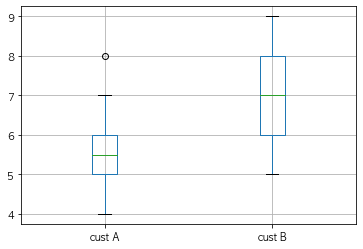

In [22]:
# box-plot
df.boxplot(['cust A', 'cust B'])

In [23]:
from scipy.stats import shapiro

In [24]:
# cust A : 정규성 검정
statistic, p = stats.shapiro(df['cust A'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9094840288162231, p-value=0.06230909377336502


In [25]:
# cust B : 정규성 검정
statistic, p = stats.shapiro(df['cust B'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9119446873664856, p-value=0.06941930204629898


In [26]:
# 등분산성 검정(levene : 정규분포 따르지 않을 때)
stats.levene(df['cust A'], df['cust B'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

- p-value가 0.83이므로, 두 집단의 분산은 같다고 할 수 있다.

In [27]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['cust A'], df['cust B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print('1-Sample t-test')
print('t 검정통계량 : {}'.format(t))
print('p-value : {}'.format(p))

1-Sample t-test
t 검정통계량 : -3.596
p-value : 0.001


- 결론 : 유의수준 5%에서 검정통계량 p값이 0.001이므로 고객간에 고객만족도의 차이가 있다.

## [실습1] 
- 제품 두께 측정 위해 A공급자, B공급자에 대한 데이터 수집
- A공급자와 B공급자 간에 모평균에 차이 있는지? (유의수준 0.05)

In [13]:
# 데이터 가져오기
df = pd.read_csv("../data/2sample_ex.csv")
df.head()

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


<AxesSubplot:>

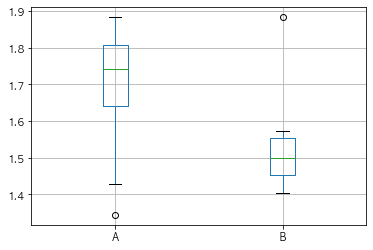

In [14]:
# box-plot
df.boxplot(['A', 'B'])

In [15]:
from scipy.stats import shapiro

In [16]:
# A : 정규성 검정
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8425756096839905, p-value=0.08004552870988846


In [17]:
# B : 정규성 검정
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.7734811902046204, p-value=0.014793740585446358


In [18]:
# 등분산성 검정
stats.levene(df['A'], df['B'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

- p-value가 0.52이므로, 두 집단의 분산은 같다고 할 수 있다.

In [19]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print('1-Sample t-test')
print('t 검정통계량 : {}'.format(t))
print('p-value : {}'.format(p))

1-Sample t-test
t 검정통계량 : 1.7
p-value : 0.111


- 결론 : 유의수준 5%에서 검정통계량 p값이 0.111이므로 공급자간 모평균의 차이가 있다고 볼 수 없다.

<br>

# 6. Paired t-test
---

## ▪️ 정의
- 앞/뒤, 전/후 간의 비교를 하여 차이가 있는지 검정
- paired t-test는 하나의 단위의 차이를 검정한다! (2sample t-test는 집단의 차이를 검정함)

## ▪️ 가정
- 종속변수는 연속형 변수여야 한다(등간/비율)
- 변수는 서로 독립적이다
- 종속변수는 대략적으로 정규 분포 따라야 한다
- 종속변수는 이상치를 포함하지 않아야 한다

<br>

# 7. 연습 및 실습 (Paired t-test)
---

## [연습1]
- 회사원 10명
- 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정

In [28]:
# 데이터 가져오기
df = pd.read_csv("../data/paired.csv")
df.head()

# paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

# 2-sample t-test의 t ,p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-sample t-test의 t,p값 출력
print("Paired t-test")
print("t검정통계량=%.3f, p-value=%.3f" %t_result)

Paired t-test
t검정통계량=-5.324, p-value=0.000


- 결론 : 유의수준 5%에서 검정결과 p값이 0.000이므로 학원 수강 전후의 점수 차이가 있다고 할 수 있다.

In [29]:
############ NOTE ##################
# 헷갈릴 땐 적으면서 정리를 해 보자..

# p-value가 유의수준보다 '작으면' 귀무가설 기각한다.

# 귀무가설(H0)은 기존에 지지하던 이론.
# 대립가설(H1)은 새롭게 지지하고자 하는 이론으로, 학원가기 전후에 차이가 있다는 것!

# 이 문제에서, 검정결과를 살펴보면 p-value의 값이 0으로 유의수준 0.05보다 작으므로 귀무가설 기각되고, 대립가설 채택된다!

## 따라서, 학원 수강 전후의 점수차이가 있는 것!

## [실습1]
- 회사원 10명
- 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정

In [127]:
# 데이터 가져오기
df = pd.read_csv("./data/paired2.csv")
df.head()

# paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

# 2-sample t-test의 t ,p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-sample t-test의 t,p값 출력
print("Paired t-test")
print("t검정통계량=%.3f, p-value=%.3f" %t_result)

Paired t-test
t검정통계량=-2.266, p-value=0.050


- 결론 : 유의수준 5%에서 검정결과 p값이 0.050이므로 학원 수강 전후의 점수 차이가 있다고 할 수 없다.